In [116]:
import pandas as pd
import numpy as np
import random

# Load original CSV
df = pd.read_csv("dataset/MentalHealthSurvey.csv")

# Drop unneeded columns
columns_to_drop = [
    'university', 'degree_level', 'academic_year', 'campus_discrimination',
    'sports_engagement', 'study_satisfaction', 'academic_pressure',
    'isolation', 'stress_relief_activities'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [117]:
df['residential_status'] = df['residential_status'].map({'Off-Campus': 0, 'On-Campus': 1})


In [119]:
def average_cgpa(cgpa_str):
    try:
        low, high = map(float, cgpa_str.split('-'))
        return round((low + high) / 2, 2)
    except:
        return None  # in case of missing or malformed values

df['cgpa'] = df['cgpa'].apply(average_cgpa)


In [120]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [121]:
def average_sleep_hours(sleep_str):
    try:
        sleep_str = sleep_str.replace('hrs', '').strip()  # remove 'hrs'
        low, high = map(float, sleep_str.split('-'))
        return round((low + high) / 2, 2)
    except:
        return None  # handle unexpected or missing values

df['average_sleep'] = df['average_sleep'].apply(average_sleep_hours)


In [122]:
df['depression'] = df['depression'].apply(lambda x: 0 if x in [1, 2, 3] else 1 if x in [4, 5] else None)


In [135]:
df.head()

,gender,age,cgpa,residential_status,average_sleep,academic_workload,financial_concerns,social_relationships,depression,anxiety,future_insecurity
0,1,20,3.25,0,5.0,4,4,3,0,1,2
1,1,20,3.25,0,5.0,4,1,3,0,3,4
2,1,20,2.75,0,3.0,5,3,4,0,3,1
3,1,20,2.75,1,5.0,5,4,1,1,5,3
4,0,20,3.25,0,5.0,5,2,3,1,5,4


In [124]:
df.drop(columns=['degree_major'], inplace=True)


In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                87 non-null     int64  
 1   age                   87 non-null     int64  
 2   cgpa                  87 non-null     float64
 3   residential_status    87 non-null     int64  
 4   average_sleep         87 non-null     float64
 5   academic_workload     87 non-null     int64  
 6   financial_concerns    87 non-null     int64  
 7   social_relationships  87 non-null     int64  
 8   depression            87 non-null     int64  
 9   anxiety               87 non-null     int64  
 10  future_insecurity     87 non-null     int64  
dtypes: float64(2), int64(9)
memory usage: 7.6 KB


In [126]:
from sklearn.model_selection import train_test_split


In [127]:
X = df.drop(columns=['depression'])  # features
y = df['depression']                # target


In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [129]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


In [130]:
model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [131]:
y_pred = model.predict(X_test)



In [132]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


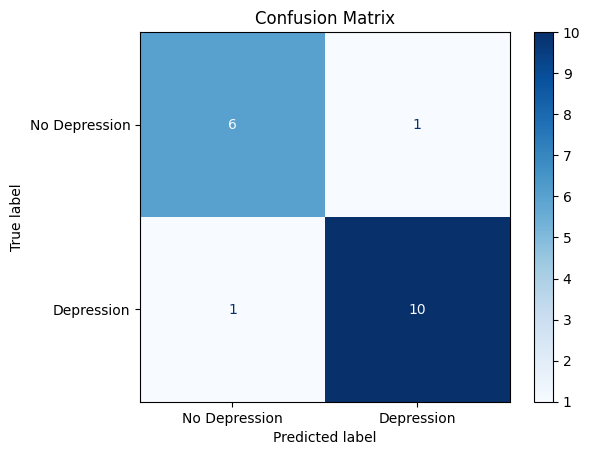

In [134]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle

# X = your features, y = your target (depression column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [137]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
